tensor([[0.4300, 0.1500, 0.8900],
        [0.5500, 0.8700, 0.6600],
        [0.5700, 0.8500, 0.6400],
        [0.2200, 0.5800, 0.3300],
        [0.7700, 0.2500, 0.1000],
        [0.0500, 0.8000, 0.5500]])


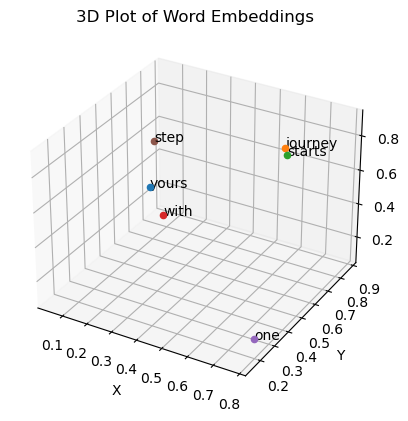

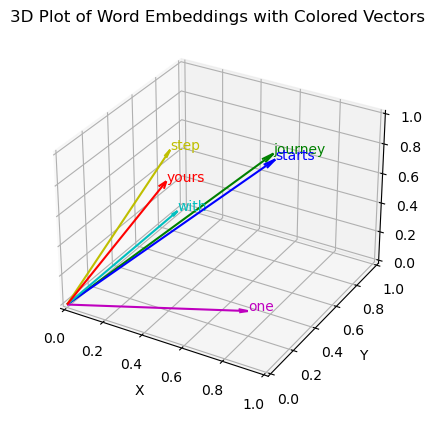

Attention Scores tensor([0.9544, 1.4950, 1.4754, 0.8434, 0.7070, 1.0865])
Sum: tensor(6.5617)
Attention weights: tensor([0.1455, 0.2278, 0.2249, 0.1285, 0.1077, 0.1656])
Sum of attention weights: tensor(1.0000)
Attention weights: tensor([0.1385, 0.2379, 0.2333, 0.1240, 0.1082, 0.1581])
Sum of attention weights: tensor(1.)
Attention weights: tensor([0.1385, 0.2379, 0.2333, 0.1240, 0.1082, 0.1581])
Sum of attention weights: tensor(1.)
tensor([0.4419, 0.6515, 0.5683])
tensor([[0.9995, 0.9544, 0.9422, 0.4753, 0.4576, 0.6310],
        [0.9544, 1.4950, 1.4754, 0.8434, 0.7070, 1.0865],
        [0.9422, 1.4754, 1.4570, 0.8296, 0.7154, 1.0605],
        [0.4753, 0.8434, 0.8296, 0.4937, 0.3474, 0.6565],
        [0.4576, 0.7070, 0.7154, 0.3474, 0.6654, 0.2935],
        [0.6310, 1.0865, 1.0605, 0.6565, 0.2935, 0.9450]])
tensor([[0.2098, 0.2006, 0.1981, 0.1242, 0.1220, 0.1452],
        [0.1385, 0.2379, 0.2333, 0.1240, 0.1082, 0.1581],
        [0.1390, 0.2369, 0.2326, 0.1242, 0.1108, 0.1565],
       

In [1]:
%run Simplified_Attention_Mechanism_no_trainable_weights.ipynb

In [2]:
print(inputs)

tensor([[0.4300, 0.1500, 0.8900],
        [0.5500, 0.8700, 0.6600],
        [0.5700, 0.8500, 0.6400],
        [0.2200, 0.5800, 0.3300],
        [0.7700, 0.2500, 0.1000],
        [0.0500, 0.8000, 0.5500]])


In [14]:
d_2 = inputs[1]

d_in = inputs.shape[1]

d_out = 2

# Weight initialization Wq, Wk, and Wv

In [18]:
torch.manual_seed(123)

W_query = torch.nn.Parameter(torch.rand(d_in,d_out),requires_grad=False) #query weight initialization
W_key = torch.nn.Parameter(torch.rand(d_in,d_out),requires_grad=False) #Key weight initialization
W_Value = torch.nn.Parameter(torch.rand(d_in,d_out),requires_grad=False) #Value weight initialization

print(W_query),print(W_key),print(W_Value)

Parameter containing:
tensor([[0.2961, 0.5166],
        [0.2517, 0.6886],
        [0.0740, 0.8665]])
Parameter containing:
tensor([[0.1366, 0.1025],
        [0.1841, 0.7264],
        [0.3153, 0.6871]])
Parameter containing:
tensor([[0.0756, 0.1966],
        [0.3164, 0.4017],
        [0.1186, 0.8274]])


(None, None, None)

# Computing query , key and value vector for a single one

In [22]:
query_2 = d_2 @ W_query
key_2 = d_2 @ W_key
value_2 = d_2 @ W_Value
print(query_2),print(key_2),print(value_2)

tensor([0.4306, 1.4551])
tensor([0.4433, 1.1419])
tensor([0.3951, 1.0037])


(None, None, None)

# Obtaining all keys and values by matrix multiplication

In [26]:
query = inputs @ W_query
key = inputs @ W_key
value = inputs @ W_Value
print(query),print(key),print(value)

tensor([[0.2309, 1.0966],
        [0.4306, 1.4551],
        [0.4300, 1.4343],
        [0.2355, 0.7990],
        [0.2983, 0.6565],
        [0.2568, 1.0533]])
tensor([[0.3669, 0.7646],
        [0.4433, 1.1419],
        [0.4361, 1.1156],
        [0.2408, 0.6706],
        [0.1827, 0.3292],
        [0.3275, 0.9642]])
tensor([[0.1855, 0.8812],
        [0.3951, 1.0037],
        [0.3879, 0.9831],
        [0.2393, 0.5493],
        [0.1492, 0.3346],
        [0.3221, 0.7863]])


(None, None, None)

# Finding attension score for a single Query vector

In [34]:
attn_score_2 = query_2 @ key.T

print(attn_score_2)

tensor([1.2705, 1.8524, 1.8111, 1.0795, 0.5577, 1.5440])


# Finding attension scores for all Queries

In [38]:
attn_score = query @ key.T
print(attn_score)

tensor([[0.9231, 1.3545, 1.3241, 0.7910, 0.4032, 1.1330],
        [1.2705, 1.8524, 1.8111, 1.0795, 0.5577, 1.5440],
        [1.2544, 1.8284, 1.7877, 1.0654, 0.5508, 1.5238],
        [0.6973, 1.0167, 0.9941, 0.5925, 0.3061, 0.8475],
        [0.6114, 0.8819, 0.8626, 0.5121, 0.2707, 0.7307],
        [0.8995, 1.3165, 1.2871, 0.7682, 0.3937, 1.0996]])


# Finding attension Weights 

In [41]:
d_k = key.shape[-1]

attn_weights_2 = torch.softmax(attn_score_2/d_k**0.5,dim=-1)

print(d_k),print(attn_weights_2)

2
tensor([0.1500, 0.2264, 0.2199, 0.1311, 0.0906, 0.1820])


(None, None)

# Understanding context vector by taking one simple example

In [42]:
context_vector_2 = attn_weights_2 @ value

print(context_vector_2)

tensor([0.3061, 0.8210])


# Self attention python class implementation

In [66]:
#Implementation with nn.Parameter module

import torch.nn as nn

class SelfAttention_V1(nn.Module):
    def __init__(self,d_in,d_out):
        super().__init__()
        self.W_query = nn.Parameter(torch.rand(d_in,d_out))
        self.W_key = nn.Parameter(torch.rand(d_in,d_out))
        self.W_value = nn.Parameter(torch.rand(d_in,d_out))
        
    def forward(self,x):
        query = x @ self.W_query
        key = x @ self.W_key
        value = x @ self.W_value
        
        #attension scores 
        attn_scores = query @ key.T
        attn_weights = torch.softmax(attn_scores/key.shape[-1]**0.5,dim=-1)
        
        #context vector
        context_vectors = attn_weights @ value
        
        return context_vectors
            

In [56]:
torch.manual_seed(123)
sa_v1 = SelfAttention_V1(d_in,d_out)
print(sa_v1(inputs))

tensor([[0.2996, 0.8053],
        [0.3061, 0.8210],
        [0.3058, 0.8203],
        [0.2948, 0.7939],
        [0.2927, 0.7891],
        [0.2990, 0.8040]], grad_fn=<MmBackward0>)


In [65]:
#Implementation with nn.Linear module

import torch.nn as nn

class SelfAttention_V2(nn.Module):
    def __init__(self,d_in,d_out,qkv_bias=False):
        super().__init__()
        self.W_query = nn.Linear(d_in,d_out,bias=qkv_bias)
        self.W_key = nn.Linear(d_in,d_out,bias=qkv_bias)
        self.W_value = nn.Linear(d_in,d_out,bias=qkv_bias)
        
    def forward(self,x):
        query = self.W_query(x)
        key = self.W_key(x)
        value = self.W_value(x)
        
        #attension scores 
        attn_scores = query @ key.T
        attn_weights = torch.softmax(attn_scores/key.shape[-1]**0.5,dim=-1)
        
        #context vector
        context_vectors = attn_weights @ value
        
        return context_vectors
            

In [64]:
torch.manual_seed(789)
sa_v2 = SelfAttention_V2(d_in,d_out)
print(sa_v2(inputs))

tensor([[-0.0739,  0.0713],
        [-0.0748,  0.0703],
        [-0.0749,  0.0702],
        [-0.0760,  0.0685],
        [-0.0763,  0.0679],
        [-0.0754,  0.0693]], grad_fn=<MmBackward0>)
